In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import math
from scipy import signal
import scipy as sc

# Lire et afficher l'image à utiliser

In [2]:
image = np.genfromtxt('image.csv', delimiter=';')
plt.imsave("im.png", image, cmap='gray')

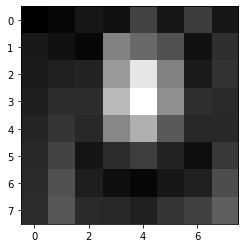

In [3]:
plt.imshow(image,cmap='gray')

# Calculer les métriques sur l'image
1.	Calculer la moyenne de luminance de l’image.
2.	Donner la dynamique de l’image (intervalle [Lmin, Lmax]).
3.	Calculer le contraste de l’image.
4.	Calculer l’écart type des niveaux de gris de l’image.


In [4]:
#LA moyenne de luminance
def lum (matrice):
    h,w=matrice.shape[0],matrice.shape[1]
    n=h*w
    s=0
    for i in range(h):
        for j in range(w):
            s=s+matrice[i][j]
    m=s/n
    return(m)
L=lum(image)
print("La moyenne de luminance = " +  str(L))

La moyenne de luminance = 76.078125


In [5]:
#la dynamique de l’image
def minmaxlum (matrice):
    h,w=matrice.shape[0],matrice.shape[1]
    n=h*w
    s=0
    min=matrice[0][0]
    max=matrice[0][0]
    for i in range(h):
        for j in range(w):
            if matrice[i][j]>max:
                max= matrice[i][j]
            if matrice[i][j]<min:
                min= matrice[i][j]
    return(min,max)
minmax=minmaxlum(image)
print("Dynamique de l'image = " + str(minmax))

Dynamique de l'image = (52.0, 154.0)


In [6]:
#le contraste de l’image
C=(minmax[1]-minmax[0])/(minmax[1]+minmax[0])
print("Contraste de l'image= "+ str(C))

Contraste de l'image= 0.49514563106796117


In [7]:
#l’écart type des niveaux de gris de l’image
r = 0
for i in image:
    for j in i:
        r = r + (j - L)**2
print("L'ecart type de l'image : " + str(r/ image.size))

L'ecart type de l'image : 437.509521484375


# Histogramme et histogramme cumulé
5.	Construire l’histogramme de cette image ainsi que son histogramme normalisé.
6.	Construire l’histogramme cumulé de cette image ainsi que son histogramme cumulé normalisé.


<Figure size 432x288 with 0 Axes>

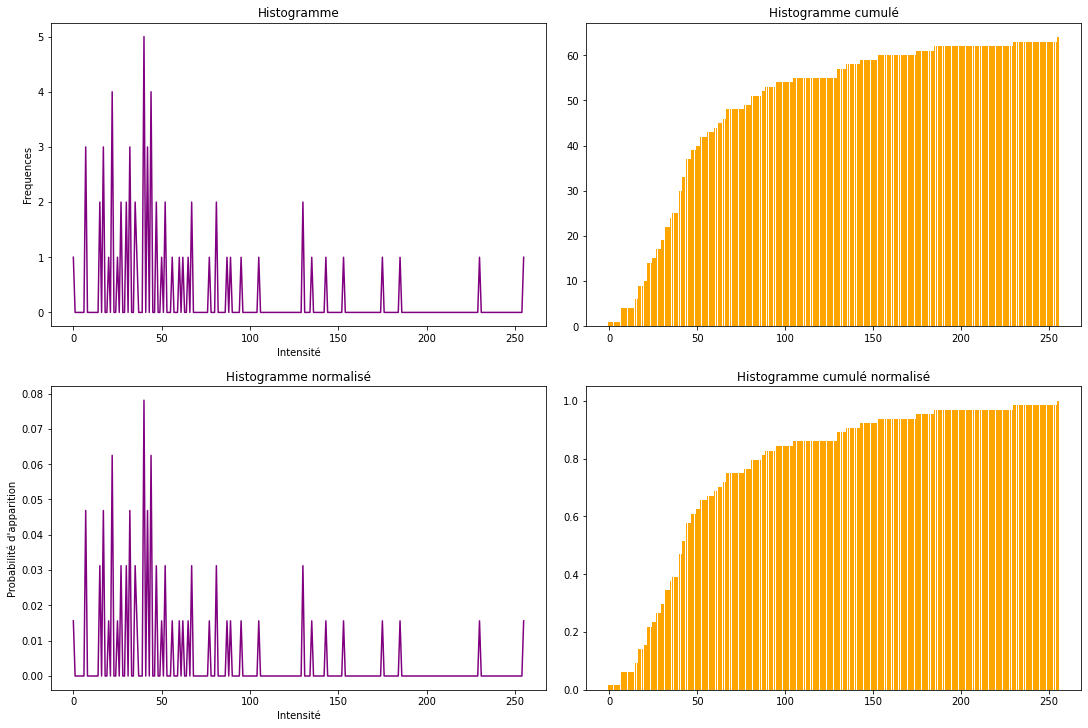

<Figure size 432x288 with 0 Axes>

In [8]:
#Histogrammes 
plt.rcParams['figure.constrained_layout.use'] = True
#----------------------------------------------------------------------------------------------------------
#histogramme standard
def Histogramme(Image):
    Image_Height = Image.shape[0]
    Image_Width = Image.shape[1]
 
    Histogram = np.zeros([256])

    for x in range(0, Image_Height):
        for y in range(0, Image_Width):
            Histogram[Image[x,y]]=Histogram[Image[x,y]]+1
    return Histogram

def Plot_Histogram(Histogram):
    
    plt.setp(axis[0, 0], ylabel='Frequences')
    plt.setp(axis[0, 0], xlabel='Intensité')
    axis[0, 0].plot(Histogram,color='purple')
    axis[0, 0].set_title("Histogramme")
    plt.savefig("Histogramme_GrayScale.jpg")
    #blue_patch = mp.Patch(color='red', label='histogramme cumulé')
   # red_patch = mp.Patch(color='blue', label='histogramme')
    #plt.legend(handles=[blue_patch,red_patch])
#----------------------------------------------------------------------------------------------------------
#histogramme normalisé
    
def Plot_normalisé(norm):
    axis[1, 0].plot(norm,color='purple')
    axis[1, 0].set_title("Histogramme normalisé")
    plt.setp(axis[1, 0], xlabel="Intensité")
    plt.setp(axis[1, 0], ylabel="Probabilité d'apparition")
    
#----------------------------------------------------------------------------------------------------------
#histogramme cumulé
def cumul_hist(hist):
    cum_gray = []
    sum_prop = 0.
    for i in hist:
        sum_prop += i
        cum_gray.append(sum_prop)  
    return cum_gray

#----------------------------------------------------------------------------------------------------------
#histogramme cumulé normalisé

def cumul_norm(hist):
    cum_gray = []
    sum_prop = 0.
    for i in hist:
        sum_prop += i
        cum_gray.append(sum_prop)  
    return cum_gray
#----------------------------------------------------------------------------------------------------------
#equalization
def equalization(image,hist):
    image_hist = np.zeros(256)
    cum_sum = np.cumsum(hist)
    one = (cum_sum - cum_sum.min()) * 255
    two= cum_sum.max() - cum_sum.min()
    uniform_norm = one / two
    uniform_norm = uniform_norm.astype('int')
    return uniform_norm[image]
#----------------------------------------------------------------------------------------------------------
#sortie
#histogramme
index = [i for i in range(0,256)]
Input_Image= cv2.imread("im.png",cv2.IMREAD_GRAYSCALE)
Histogram_GrayScale=Histogramme(Input_Image)
figure, axis = plt.subplots(2, 2 ,figsize=(15,10))
Plot_Histogram(Histogram_GrayScale)
#histogramme normalisé
norm =Histogram_GrayScale/64
Plot_normalisé(norm)
#histogramme cumulé
c=cumul_hist(Histogram_GrayScale)
axis[0, 1].bar(index,c,color='orange')
axis[0, 1].set_title("Histogramme cumulé")
#histogramme cumulé normalisé
cn=cumul_norm(norm)
axis[1, 1].bar(index,cn,color='orange')
axis[1, 1].set_title("Histogramme cumulé normalisé")
plt.figure()
    

# Comparer votre implémentation aux fonctions de opencv

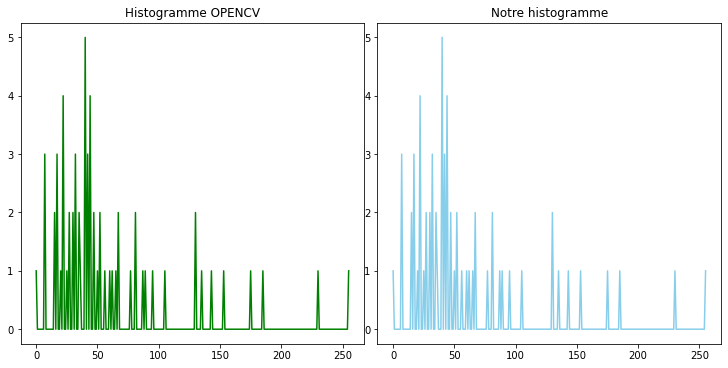

In [9]:
#cv2.calcHist
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1) 
hist = cv2.calcHist([Input_Image], [0], None, [256], [0, 256])
plt.plot(hist,color='green')
plt.title("Histogramme OPENCV")

plt.subplot(1, 2, 2 )
plt.title("Notre histogramme")
plt.plot(Histogram_GrayScale,color='skyblue')

- Expliquer la difference.
- comparer aussi avec les méthodes des autres librairies.

In [10]:
# On remarque qu'il n y a pas de difference entre l'implementation et la fonction opencv

# 7.	Etendre l’histogramme et visualiser l’image résultante.

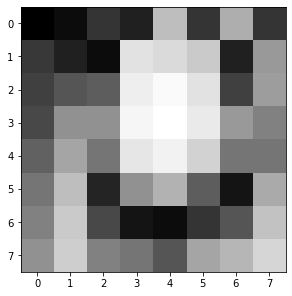

In [11]:
equ=equalization(Input_Image,Histogram_GrayScale)
plt.imshow(equ,cmap='gray') 
plt.imsave("equ.png", equ, cmap='gray')

# 8.	Comparer les histogrammes des deux images ; originale et étendue

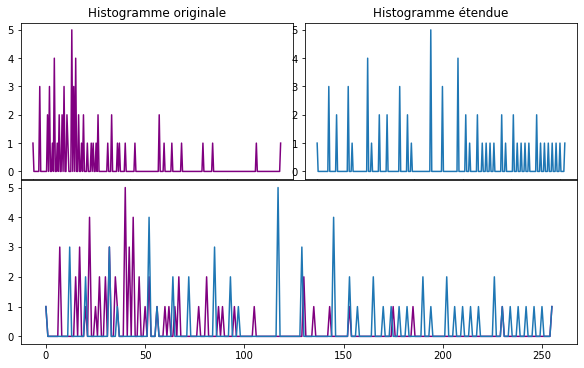

In [12]:
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
hist2 = Histogramme(Input_Image)
plt.plot(hist2,color='purple')
plt.title("Histogramme originale")

plt.subplot(2,2,2)
h = Histogramme(equ)
plt.plot(h)
plt.title("Histogramme étendue")

plt.subplot(2,2,(3,4))
plt.plot(hist2,color='purple')
plt.plot(h)



# Expansion de la dynamique et comparaison avec l'égalisation d'histogramme

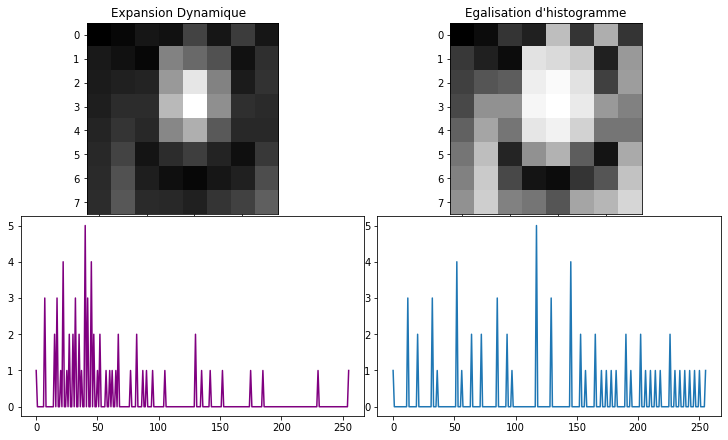

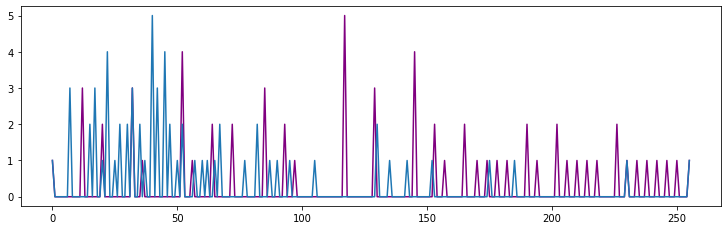

In [13]:
imgExpansion = ((image.astype(int) -minmax[0]) * 255) /  (minmax[1] - minmax[0])


arrExpansion = np.zeros(256)
for i in imgExpansion:
    for j in i:
        arrExpansion[int(j)]+=1
        
        
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
plt.imshow(imgExpansion, cmap = 'gray')
plt.title("Expansion Dynamique  ")
plt.subplot(2,2,2)

plt.title("Egalisation d'histogramme")
plt.imshow(equ, cmap = 'gray')
plt.subplot(2,2,3)
plt.plot(arrExpansion,color='purple')
plt.subplot(2,2,4)
plt.plot(h)
plt.figure(figsize = (10,6))
plt.subplot(2,2,(1,2))
plt.plot(h,color='purple')
plt.plot(arrExpansion)

# Améliorer le contraste des images données
améliorer le contraste des 3 images envoyées avec les méthodes implémentées precedemment.

<ipython-input-14-5f7bc1ed610e>:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout(pad=3.0)
<ipython-input-14-5f7bc1ed610e>:42: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout(pad=3.0)
<ipython-input-14-5f7bc1ed610e>:57: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout(pad=3.0)


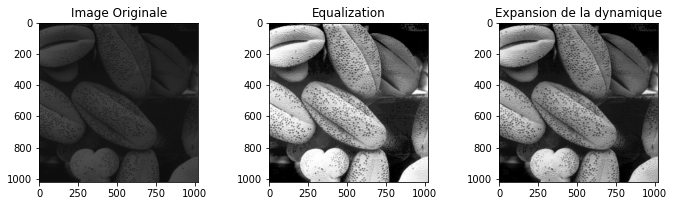

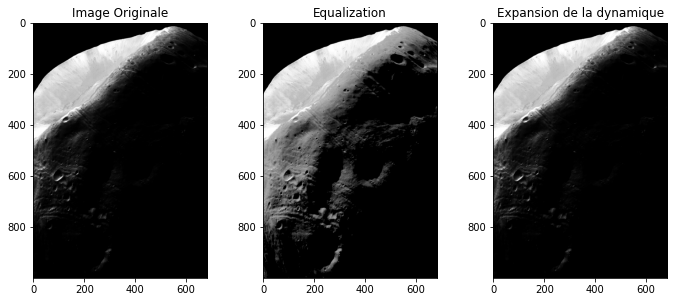

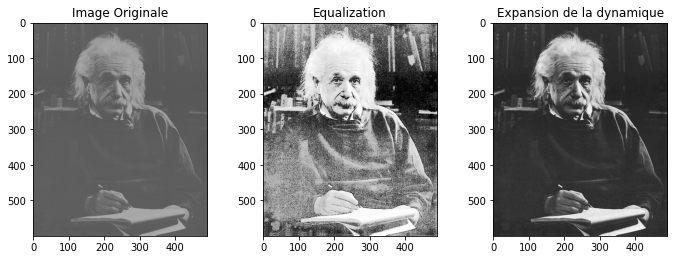

In [14]:
image11 = cv2.imread("Fig0208(a).tif",cv2.IMREAD_GRAYSCALE)

image22 = cv2.imread("Fig0210(a).tif",cv2.IMREAD_GRAYSCALE)
image33 = cv2.imread("enstein.tif",cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist([image11], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([image22], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([image33], [0], None, [256], [0, 256])
imgExp1= ((image11.astype(int)- image11.min()) * 255) /  (image11.max() - image11.min())
imgExp2 = ((image22.astype(int) - image22.min()) * 255) /  (image22.max() - image22.min())
imgExp3 = ((image33.astype(int)- image33.min()) * 255) /  (image33.max() - image33.min())



plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image11, cmap='gray')
plt.clim(0,256)
plt.title("Image Originale")
plt.subplot(1,3,2)
image_eq1=equalization(image11,hist1)
plt.imshow(image_eq1, cmap='gray')
plt.title("Equalization")
plt.subplot(1,3,3)
plt.imshow(imgExp1, cmap = 'gray')
plt.title("Expansion de la dynamique")
plt.tight_layout(pad=3.0)


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image22, cmap='gray')
plt.clim(0,256)
plt.title("Image Originale")
plt.subplot(1,3,2)
image_eq2=equalization(image22,hist2)
plt.imshow(image_eq2, cmap='gray')
plt.title("Equalization")
plt.subplot(1,3,3)
plt.imshow(imgExp2, cmap = 'gray')
plt.title("Expansion de la dynamique")
plt.tight_layout(pad=3.0)


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image33, cmap='gray')
plt.clim(0,256)
plt.title("Image Originale")
plt.subplot(1,3,2)
image_eq3=equalization(image33,hist3)
plt.imshow(image_eq3, cmap='gray')
plt.title("Equalization")
plt.subplot(1,3,3)
plt.imshow(imgExp3, cmap = 'gray')
plt.title("Expansion de la dynamique")
plt.tight_layout(pad=3.0)


